In [11]:
import pandas as pd
import matplotlib.pyplot as plt

## Sheldon Cooper's Relationship Agreement

In the *Big Bang Theory* TV series, the show's resident genius - Sheldon Cooper - enjoys creating legally-binding agreements that specify the particulars of any relationship he is presently in.  His budding romance with Amy is regulated by their relationship agreement, as is his relationship with his roommate, Leonard Hofstadter. 


*insert photo here*

## Python Functions

The fundamental concept behind functions is the notion of a contract.  Just as Sheldon's relationship and roommate agreements ensure that the parties involved will act in regular and predictable ways, so too the interface to a function is like a contract.  If a call to a function passes the correct arguments in the correct order, a well written function responds in a predictable way, providing the promised output. 

Let's revisit the code we wrote in the loops clinic to illustrate the process of writing a custom function.

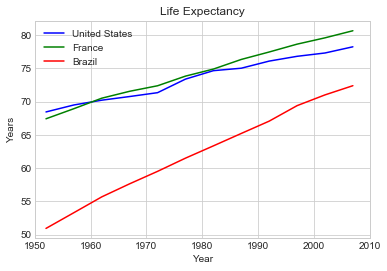

In [96]:
plt.style.use('seaborn-whitegrid')
  
# Read the .csv file into the df_tmp dataframe.
df  = pd.read_csv('../data/gapminder.csv', index_col = 0)
  
# Set parameters for the base plot and its axes.
ax = plt.axes()
ax.set(xlabel = 'Year', 
       ylabel = 'Years', 
         xlim = (1950, 2010), 
        title = 'Life Expectancy')

# Create a vector of the countries to be graphed.
countries   = ['United States','France','Brazil']
line_colors = ['blue','green','red']
  
for idx in range(len(countries)):
    df_gap = df.loc[countries[idx]]
    plt.plot(df_gap[['year']], df_gap[['lifeExp']], color = line_colors[idx], label=countries[idx])
  
ax.legend()
plt.show()

Before writing the function, we need to first specify its name, arguments, and output.  The code in the block above plots life expectancies for three countries over time, from 1950 to 2010.  So let's call our new function: *plot_life_expect()* and obviously we want this function to create a line graph.  A graph is therefore the desired **output**.  In this example, the function won't *return* anything to the code that calls it.  Rather, it will simply create a graph.  (Keep in mind that most functions do indeed return values to their callers).

With a name selected and output defined, our next step is to define the function's arguments.  Given this code, what arguments do we need to pass to this new function?  Did you consider the two vectors - *countries* and *line_colors* - as possible candidates?  If so, give yourself an A.  An initial definition of the interface is listed in the code chunk below.

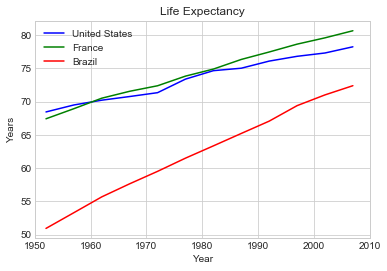

In [35]:
def plot_life_expect(countries, line_colors):
    '''plot_life_expect: This function creates a life expectancy line plot for a vector of countries.
       First, it creates a figure to plot our graph on, including axis labels and a title. 
       Then, it loops through the countries, extracting the value from our df and plotting them with 
       the respective color. The ith country corresponds to the ith color in the list. 
       
       Parameters:
       countries: vector of strings indicating the countries to obtain from gapminder.csv
       line_colors: vector of line colors indicating the colors of our lines
    '''
    ax = plt.axes()
    ax.set(xlabel = 'Year', 
       ylabel = 'Years', 
         xlim = (1950, 2010), 
        title = 'Life Expectancy')
    
    for i in range(len(countries)):
        df_gap = df.loc[countries[i]]
        plt.plot(df_gap[['year']], df_gap[['lifeExp']], color = line_colors[i], label=countries[i])
        
    ax.legend()
    plt.show()
    
plot_life_expect(countries, line_colors)

This might seem like a lot of documentation to create a simple function.  But the effort is well rewarded once you decide to create a package.  (In a future clinic, we cover package development and construction).

Let's try to call the function on other countries and colors. Through this exercise we will recognize the importance and efficiency of functions. 

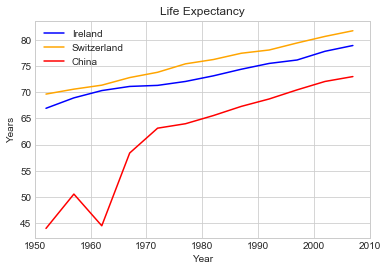

In [100]:
new_countries = ['Ireland', 'Switzerland', 'China']
new_colors = ['blue', 'orange', 'red']

plot_life_expect(new_countries, new_colors)

That was much easier than typing everything out again! Now, comes another important element of making functions. What happens when we fail to put in a similar datatype? What kind of datatypes do we want the function to accept? We need to define these questions in detail.

## Creating Tests 

We're going to make another function to insert into our function (yes, a function within a function!) that will check the data types for us, so we don't have to. This way, we won't face any complications by putting in wrong data types. It may be easy to spot wrong datatypes now as creators of the function, but this comes in handy when handling other people's functions, and vice versa. 

We will be using a handy tool called assertions. They can easily check datatypes and will raise an error (stop a function) if a value asserts something as false.

In [103]:
# Assertions 

assert isinstance(2, int)

assert isinstance('hello world', str)

hello = 'hello world'

assert isinstance(hello, int), '%r is not a number!' % hello

AssertionError: 'hello world' is not a number!

In [104]:
def list_test(lis):
    assert isinstance(lis, list), '%r should be a list' % lis
    for i in range(len(lis)):
        assert isinstance(lis[i], str), '%r should contain strings' % lis

Now that we have a test function, let's implement it into our function. 

In practice, we should be thinking about our test function *before* we make our function. This is known as defensive programming. We want to really make sure our function is free of bugs by identifying them before our function is run. 

In [105]:
def plot_life_expect(countries, line_colors):
    '''plot_life_expect: This function creates a life expectancy line plot for a vector of countries.
       First, it creates a figure to plot our graph on, including axis labels and a title. 
       Then, it loops through the countries, extracting the value from our df and plotting them with 
       the respective color. The ith country corresponds to the ith color in the list. 
       
       Parameters:
       countries: vector of strings indicating the countries to obtain from gapminder.csv
       line_colors: vector of line colors indicating the colors of our lines
    '''
    for _ in locals().values():
        list_test(_)
        
    ax = plt.axes()
    ax.set(xlabel = 'Year', 
       ylabel = 'Years', 
         xlim = (1950, 2010), 
        title = 'Life Expectancy')
    
    for i in range(len(countries)):
        df_gap = df.loc[countries[i]]
        plt.plot(df_gap[['year']], df_gap[['lifeExp']], color = line_colors[i], label=countries[i])
        
    ax.legend()
    plt.show()

In [93]:
# Test our test functions! 

no_strings = ['China', 2, 'England']
no_list = {'color': 'blue'}

plot_life_expect(countries, no_list)

AssertionError: {'color': 'blue'} should be a list

In [95]:
plot_life_expect(no_strings, line_colors)

AssertionError: ['China', 2, 'England'] should contain strings

## Review

In this myDataStory learning experience, we introduced you to Python functions, using Sheldon Cooper's legal agreements as a fun way to introduce the idea of contract and black-box functional programming.

Here are the key points:

* Frequently, you will find yourself copying and pasting a block of code repeatedly, with but minor modifications.  When this happens, consider the power of loops to cut down on the amount of code you write.  Always keep this dictum in mind, "Thou shalt not repeat thyself!" 

* If you begin to repeat yourself, first determine what is changing in each block of code.  Then, try to replace the changing pieces with code that relies on indexes


.  For example, we replaced 'United States','France', and 'Brazil' with `countries[0]`,`countries[1]`, and `countries[2]` respectively.  Finally, if we're able to do this, we can probably use loops to avoid repetition.

* Avoid the dreaded infinite loop by always ensuring that an exit condition is met.  In some cases, this will require you to increment an index variable, as is the case with `while` loops.

## Problem Sets

1. 

2. 

3. 
